# data Exploration and Pre-processing

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv("Python_Linear_Regres.csv")


In [3]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,4.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [4]:
#To Fill Null value of experience column with the value 0 
df.experience = df.experience.fillna(0)
df.experience

0     0.0
1     0.0
2     5.0
3     4.0
4     7.0
5     3.0
6    10.0
7    11.0
Name: experience, dtype: float64

In [5]:
#Replace the Null values of the column test score with mean value
import math
mean_t = (df['test_score(out of 10)'].mean())
mean_t
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(mean_t)
df['test_score(out of 10)']


0     8.000000
1     8.000000
2     6.000000
3    10.000000
4     9.000000
5     7.000000
6     7.857143
7     7.000000
Name: test_score(out of 10), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

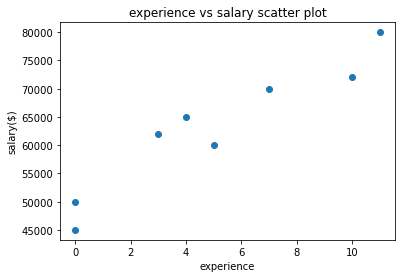

In [6]:
#Display a scatter plot between experience and Salary 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.scatter(df['experience'],df['salary($)'])
plt.xlabel('experience')
plt.ylabel('salary($)')
plt.title('experience vs salary scatter plot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

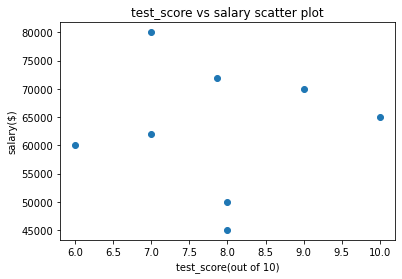

In [7]:
#Display a scatter plot between test_score and Salary 
plt.scatter(df['test_score(out of 10)'],df['salary($)'])
plt.xlabel('test_score(out of 10)')
plt.ylabel('salary($)')
plt.title('test_score vs salary scatter plot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

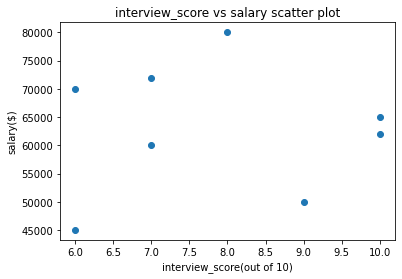

In [8]:
#Display a scatter plot between interview_score and Salary 
plt.scatter(df['interview_score(out of 10)'],df['salary($)'])
plt.xlabel('interview_score(out of 10)')
plt.ylabel('salary($)')
plt.title('interview_score vs salary scatter plot')
plt.show

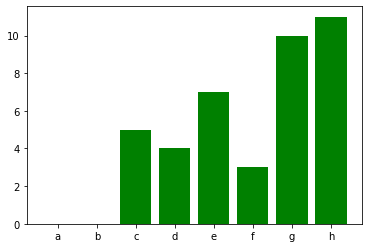

In [9]:
#Disply bar plot for experience
p = np.array(['a','b','c','d','e','f','g','h'])
q = df["experience"]
plt.bar(p,q,color="green")
plt.show()

# Working with Model Part 2

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.000000,9,50000
1,0.0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,4.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [12]:
#seperate feature data from target data
x = df[['experience','test_score(out of 10)','interview_score(out of 10)']]
x
x.shape

(8, 3)

In [13]:
y = df[["salary($)"]]
y
y.shape

(8, 1)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [15]:
#split feature data from target data
x_train

,experience,test_score(out of 10),interview_score(out of 10)
6,10.0,7.857143,7
7,11.0,7.000000,8
0,0.0,8.000000,9
4,7.0,9.000000,6
5,3.0,7.000000,10
1,0.0,8.000000,6


In [16]:
x_test

,experience,test_score(out of 10),interview_score(out of 10)
2,5.0,6.0,7
3,4.0,10.0,10


In [17]:
y_train

,salary($)
6,72000
7,80000
0,50000
4,70000
5,62000
1,45000


In [18]:
y_test

,salary($)
2,60000
3,65000


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regression_model = LinearRegression()

In [21]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [22]:
#Create a Linear regression model between Features and target data
x_test

,experience,test_score(out of 10),interview_score(out of 10)
2,5.0,6.0,7
3,4.0,10.0,10


In [23]:
Predicted_Price = regression_model.predict(x_test)
Predicted_Price

array([[56595.17866161],
       [70735.58837114]])

In [24]:
y_test

,salary($)
2,60000
3,65000


In [27]:
regression_model.score(x_test,y_test)

-2.559182584759459

In [28]:
regression_model.score(x_train,y_train)

0.9700939000303833

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

In [30]:
mse= mean_squared_error(y_test,Predicted_Price)
r2_score = r2_score(y_test,Predicted_Price)

In [31]:
#Extract slope and intercept value from the model
print('Slope:' , regression_model.coef_)
print('Intercept:' , regression_model.intercept_)

Slope: [[2878.0575908  2509.06202432 2327.40640102]]
Intercept: [10858.67375454]


In [32]:
#Display root mean squared error
print('Root mean squared error:', mse)

Root mean squared error: 22244891.154746618


In [33]:
#Display R2 Score
print('R2 score:' , r2_score)

R2 score: -2.559182584759459


END